# ДЗ №7

In [1]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics


%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

## Данные HEART DISEASE 

In [2]:
df = pd.read_csv('data.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.00,0,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,2.00,0,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1.00,1,20.00,0.00,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,3.00,1,30.00,0.00,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,3.00,1,23.00,0.00,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00,0


## Удалим данные с пропусками

In [3]:
df.dropna(axis=0,inplace=True)

In [4]:
scaler = MinMaxScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)


In [6]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.00,0.18,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.11,0.23,0.28,0.36,0.10,0.00
1,0.00,0.37,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.18,0.35,0.32,0.52,0.10,0.00
2,1.00,0.42,0.00,1.00,0.29,0.00,0.00,0.00,0.00,0.27,0.21,0.34,0.24,0.31,0.08,0.00
3,0.00,0.76,0.67,1.00,0.43,0.00,0.00,1.00,0.00,0.23,0.31,0.50,0.32,0.21,0.18,1.00
4,0.00,0.37,0.67,1.00,0.33,0.00,0.00,0.00,0.00,0.35,0.22,0.38,0.18,0.41,0.13,0.00


In [8]:
X = df.drop(['TenYearCHD'], axis=1).as_matrix()
X.shape

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(3656, 15)

In [9]:
y = df['TenYearCHD'].as_matrix()
y.shape

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(3656,)

In [10]:
X.shape

(3656, 15)

In [11]:
y.shape

(3656,)

# 6 компонент компонент объясняют 90% данных

In [12]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
d

6

## Explained Variance

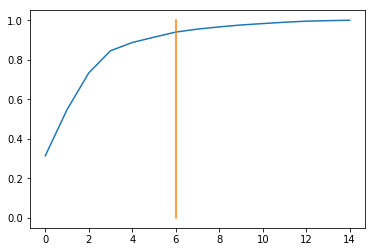

In [13]:
plt.plot(cumsum)
plt.plot([d, d], [0, 1])

# Из 2х главных компонент не понятно, можно ли разделить данные

In [14]:
pca.explained_variance_ratio_

array([0.31455186, 0.23304546, 0.18607464, 0.11195193, 0.04164222,
       0.02696261, 0.02591223, 0.01504677, 0.01127699, 0.00954838,
       0.00710737, 0.00676893, 0.00541935, 0.00258908, 0.00210216])

In [15]:
x_new = PCA(n_components=2).fit_transform(X)
x_new.shape

(3656, 2)

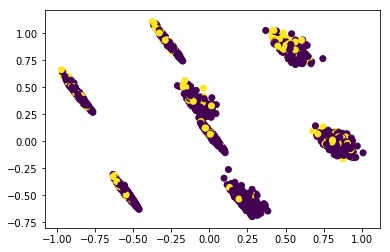

In [16]:
plt.scatter(x_new[:, 0], x_new[:, 1], c=y)

# Из 3х компонент также не понятно, можно ли разделить данные

In [17]:
x_new = PCA(n_components=3).fit_transform(X)
x_new.shape

(3656, 3)

<IPython.core.display.Javascript object>


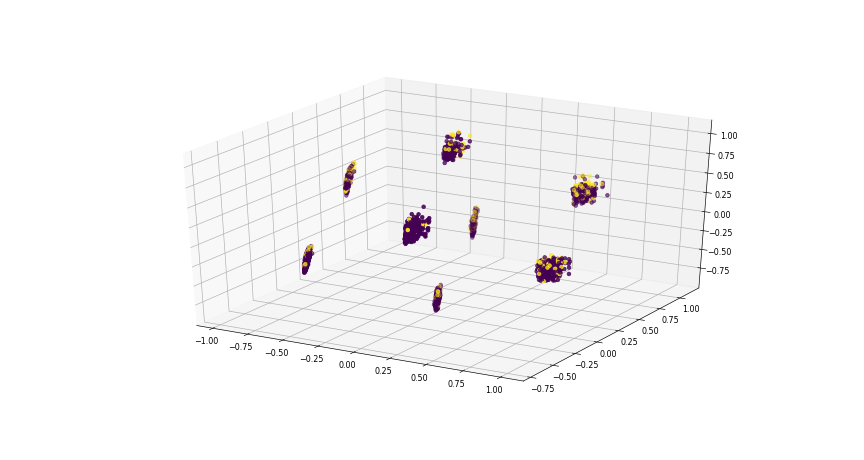

In [19]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2] )
ax.scatter(x_new[:,0], x_new[:,1], x_new[:,2], c=y)

## Возьмем только самые важные 6 компонент.

In [22]:
X_data=df.drop(['TenYearCHD'], axis=1)
pca_6 = PCA(n_components=6)
pca_6.fit(X_data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## Вывыедем значение компонент для каждого признака

In [23]:
print(pd.DataFrame(pca_6.components_,columns=X_data.columns, index = ['PC-1','PC-2','PC-3', 'PC-4', 'PC-5', 'PC-6' ]))

      male   age  education  currentSmoker  cigsPerDay  BPMeds  \
PC-1  0.57 -0.11       0.05           0.73        0.23   -0.04   
PC-2  0.51  0.16      -0.10          -0.06        0.02    0.08   
PC-3 -0.64  0.01      -0.07           0.62        0.13    0.06   
PC-4 -0.02 -0.10       0.98          -0.01       -0.01    0.02   
PC-5 -0.01  0.94       0.13           0.10       -0.01    0.09   
PC-6  0.00 -0.21      -0.00          -0.00        0.00    0.44   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  \
PC-1            -0.01         -0.26     -0.02    -0.02  -0.06  -0.05 -0.03   
PC-2             0.01          0.80      0.03     0.03   0.13   0.15  0.07   
PC-3             0.00          0.41      0.00     0.02   0.07   0.05 -0.00   
PC-4            -0.00          0.15     -0.02     0.00  -0.00   0.02 -0.03   
PC-5             0.01         -0.18      0.16     0.11   0.06  -0.02 -0.01   
PC-6             0.02         -0.06      0.84    -0.00   0.03   0.02 

# TSNE 2D

In [24]:
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_reduced = tsne.fit_transform(X)

<IPython.core.display.Javascript object>


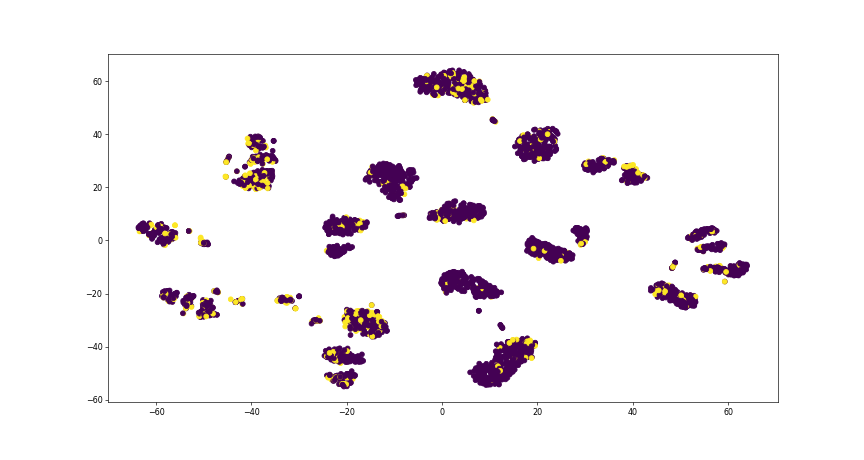

In [26]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

# LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [43]:
clf_lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
scores = cross_val_score(clf_lr, X, y, cv=5)

In [44]:
scores.mean()

0.8522981867975282

# RandomForestClassifier

In [47]:
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
scores = cross_val_score(clf_rf, X, y, cv=5)

In [48]:
scores.mean()

0.8479221117679521